In [1]:
from coursea import *

await init()


2024-01-03 15:51:29,541 I 692647 cfg4py.core:update_config:280 | configuration is
alpha: {data_home: ~/zillionare/alpha/data, tts_server: 'http://127.0.0.1:5002/api/tts?'}
backtest: {url: 'http://192.168.100.114:7080/backtest/api/trade/v0.5/'}
influxdb: {bucket_name: zillionare, enable_compress: true, max_query_size: 5000, org: zillionare,
  token: hwxHycJfp_t6bCOYe2MhEDW4QBOO4FDtgeBWnPR6bGZJGEZ_41m_OHtTJFZKyD2HsbVqkZM8rJNkMvjyoXCG6Q==,
  url: 'http://192.168.100.101:58086'}
notify: {dingtalk_access_token: 58df072143b52368086736cb38236753073ccde6537650cad1d5567747803563,
  keyword: trader}
pluto: {store: ~/zillionare/pluto/store}
redis: {dsn: 'redis://192.168.100.101:56379'}
tasks: {pooling: false, wr: false}

2024-01-03 15:51:29,545 I 692647 /home/aaron/miniconda3/envs/coursea/lib/python3.8/site-packages/omicron/dal/cache.py:init:94 | init redis cache...
2024-01-03 15:51:29,561 I 692647 /home/aaron/miniconda3/envs/coursea/lib/python3.8/site-packages/omicron/dal/cache.py:init:124 | red

init securities done


In [18]:
code = "000001.XSHE"

bars = await Stock.get_bars(code, 250, FrameType.MIN30)
bars[-10:]


array([('2023-12-29T15:00:00', 9.41, 9.42, 9.36, 9.39, 17562359., 1.64924900e+08, 126.92925),
       ('2024-01-02T10:00:00', 9.39, 9.42, 9.32, 9.35, 25545500., 2.38964914e+08, 126.92925),
       ('2024-01-02T10:30:00', 9.35, 9.36, 9.3 , 9.31, 15226600., 1.42027606e+08, 126.92925),
       ('2024-01-02T11:00:00', 9.31, 9.31, 9.27, 9.27, 14782400., 1.37317998e+08, 126.92925),
       ('2024-01-02T11:30:00', 9.28, 9.29, 9.27, 9.27,  4887031., 4.53477850e+07, 126.92925),
       ('2024-01-02T13:30:00', 9.28, 9.29, 9.26, 9.27, 12501491., 1.15919651e+08, 126.92925),
       ('2024-01-02T14:00:00', 9.27, 9.27, 9.23, 9.25, 13708038., 1.26801592e+08, 126.92925),
       ('2024-01-02T14:30:00', 9.24, 9.26, 9.23, 9.24, 14122149., 1.30481318e+08, 126.92925),
       ('2024-01-02T15:00:00', 9.24, 9.24, 9.21, 9.21, 15063436., 1.38881388e+08, 126.92925),
       ('2024-01-03T15:00:00', 9.2 , 9.2 , 9.2 , 9.2 ,   972400., 8.94608046e+06, 126.92925)],
      dtype=[('frame', '<M8[s]'), ('open', '<f4'), ('high',

In [19]:
import pandas as pd

def rolling_zscore(close, win=20):
    s = pd.Series(close)
    ma = s.rolling(window=win).mean()
    std = s.rolling(window=win).std()
    z = (s - ma)/std
    return z

zscore = rolling_zscore(bars["close"])
zscore


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
245   -1.632070
246   -1.874723
247   -1.772181
248   -1.859600
249   -1.720942
Length: 250, dtype: float64

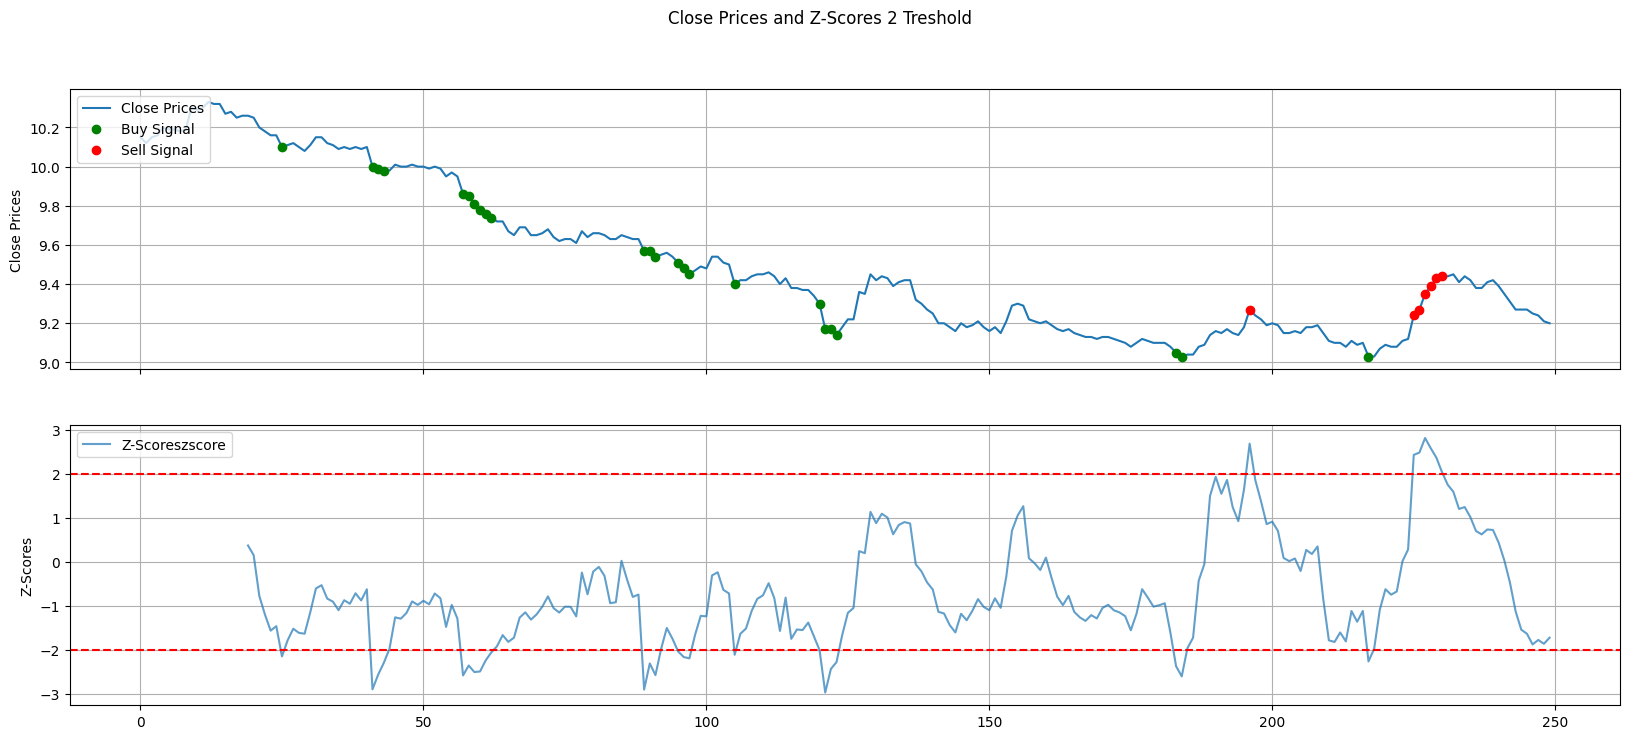

In [22]:
import matplotlib.pyplot as plt


def plot_data(close_prices, zscore):
    """Plots close prices and z-scores."""   
    
    # Create subplots for close prices and Z-scores
    fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(20, 8))   
    
    # Plot the close prices on the first subplot
    ax1.plot(close_prices.index, close_prices, label='Close Prices')
    # Plot the Z-scores on the second subplot for each period
    ax2.plot(zscore.index, zscore, label=f'Z-Scoreszscore', alpha=0.7)       
    # If the period is the first in the list, plot buy/sell signals on the first subplot
    buy_signals = (zscore < -2)
    sell_signals = (zscore > 2)
    ax1.plot(close_prices[buy_signals].index, close_prices[buy_signals], 'o', color='g', label='Buy Signal')
    ax1.plot(close_prices[sell_signals].index, close_prices[sell_signals], 'o', color='r', label='Sell Signal')
    # Set the y-label and legend for the close prices subplot
    ax1.set_ylabel('Close Prices')
    ax1.legend(loc="upper left")
    ax1.grid(True)
    
    # Draw horizontal lines indicating the Z-score thresholds on the Z-scores subplot
    ax2.axhline(-2, color='red', linestyle='--')
    ax2.axhline(2, color='red', linestyle='--')   
    # Set the y-label and legend for the Z-scores subplot
    ax2.set_ylabel('Z-Scores')
    ax2.legend(loc="upper left")
    ax2.grid(True)

    # Set the main title for the entire plot
    plt.suptitle(f'Close Prices and Z-Scores {2} Treshold')
    # Display the plots
    plt.show()

plot_data(pd.Series(bars["close"]), zscore)
